<b>This notebook was written with trhe aim of classif

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_svmlight_files

from jupyterthemes import jtplot
jtplot.style('gruvbox')

%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [2]:
### Import sparse datasets
X_train, y_train, X_test, y_test = load_svmlight_files(['cod-rna', 'cod-rna.t'])

In [3]:
### Convert sparse datasets to dense format
X_train = pd.DataFrame(X_train.todense())
X_test = pd.DataFrame(X_test.todense())

In [4]:
### Peak at the first few rows of our train dataset
X_train.head()

,0,1,2,3,4,5,6,7
0,-766.0,128.0,0.140625,0.304688,0.234375,0.140625,0.304688,0.234375
1,-726.0,131.0,0.129771,0.328244,0.229008,0.129771,0.328244,0.229008
2,-648.0,123.0,0.146341,0.333333,0.211382,0.146341,0.333333,0.211382
3,-764.0,124.0,0.137097,0.322581,0.233871,0.137097,0.322581,0.233871
4,-584.0,130.0,0.153846,0.392308,0.184615,0.153846,0.392308,0.184615


In [5]:
X_train.shape

(59535, 8)

In [6]:
X_test.shape

(271617, 8)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59535 non-null  float64
 1   1       59535 non-null  float64
 2   2       59535 non-null  float64
 3   3       59535 non-null  float64
 4   4       59535 non-null  float64
 5   5       59535 non-null  float64
 6   6       59535 non-null  float64
 7   7       59535 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [8]:
X_train.describe()

,0,1,2,3,4,5,6,7
count,59535.000000,59535.000000,59535.000000,59535.000000,59535.000000,59535.000000,59535.000000,59535.000000
mean,-461.973091,96.642983,0.221633,0.222824,0.263343,0.222729,0.221201,0.265052
std,189.562573,21.578323,0.050635,0.047500,0.041461,0.045374,0.042379,0.038051
min,-1868.000000,67.000000,0.105263,0.107692,0.083333,0.105263,0.107692,0.083333
25%,-562.000000,75.000000,0.195402,0.197368,0.241379,0.197368,0.200000,0.247059
50%,-450.000000,86.000000,0.216667,0.220779,0.266667,0.216667,0.220779,0.266667
75%,-327.000000,119.000000,0.239669,0.239316,0.290598,0.238636,0.236842,0.289474
max,0.000000,133.000000,0.478873,0.420290,0.361538,0.478873,0.420290,0.361538


<Figure size 720x720 with 0 Axes>

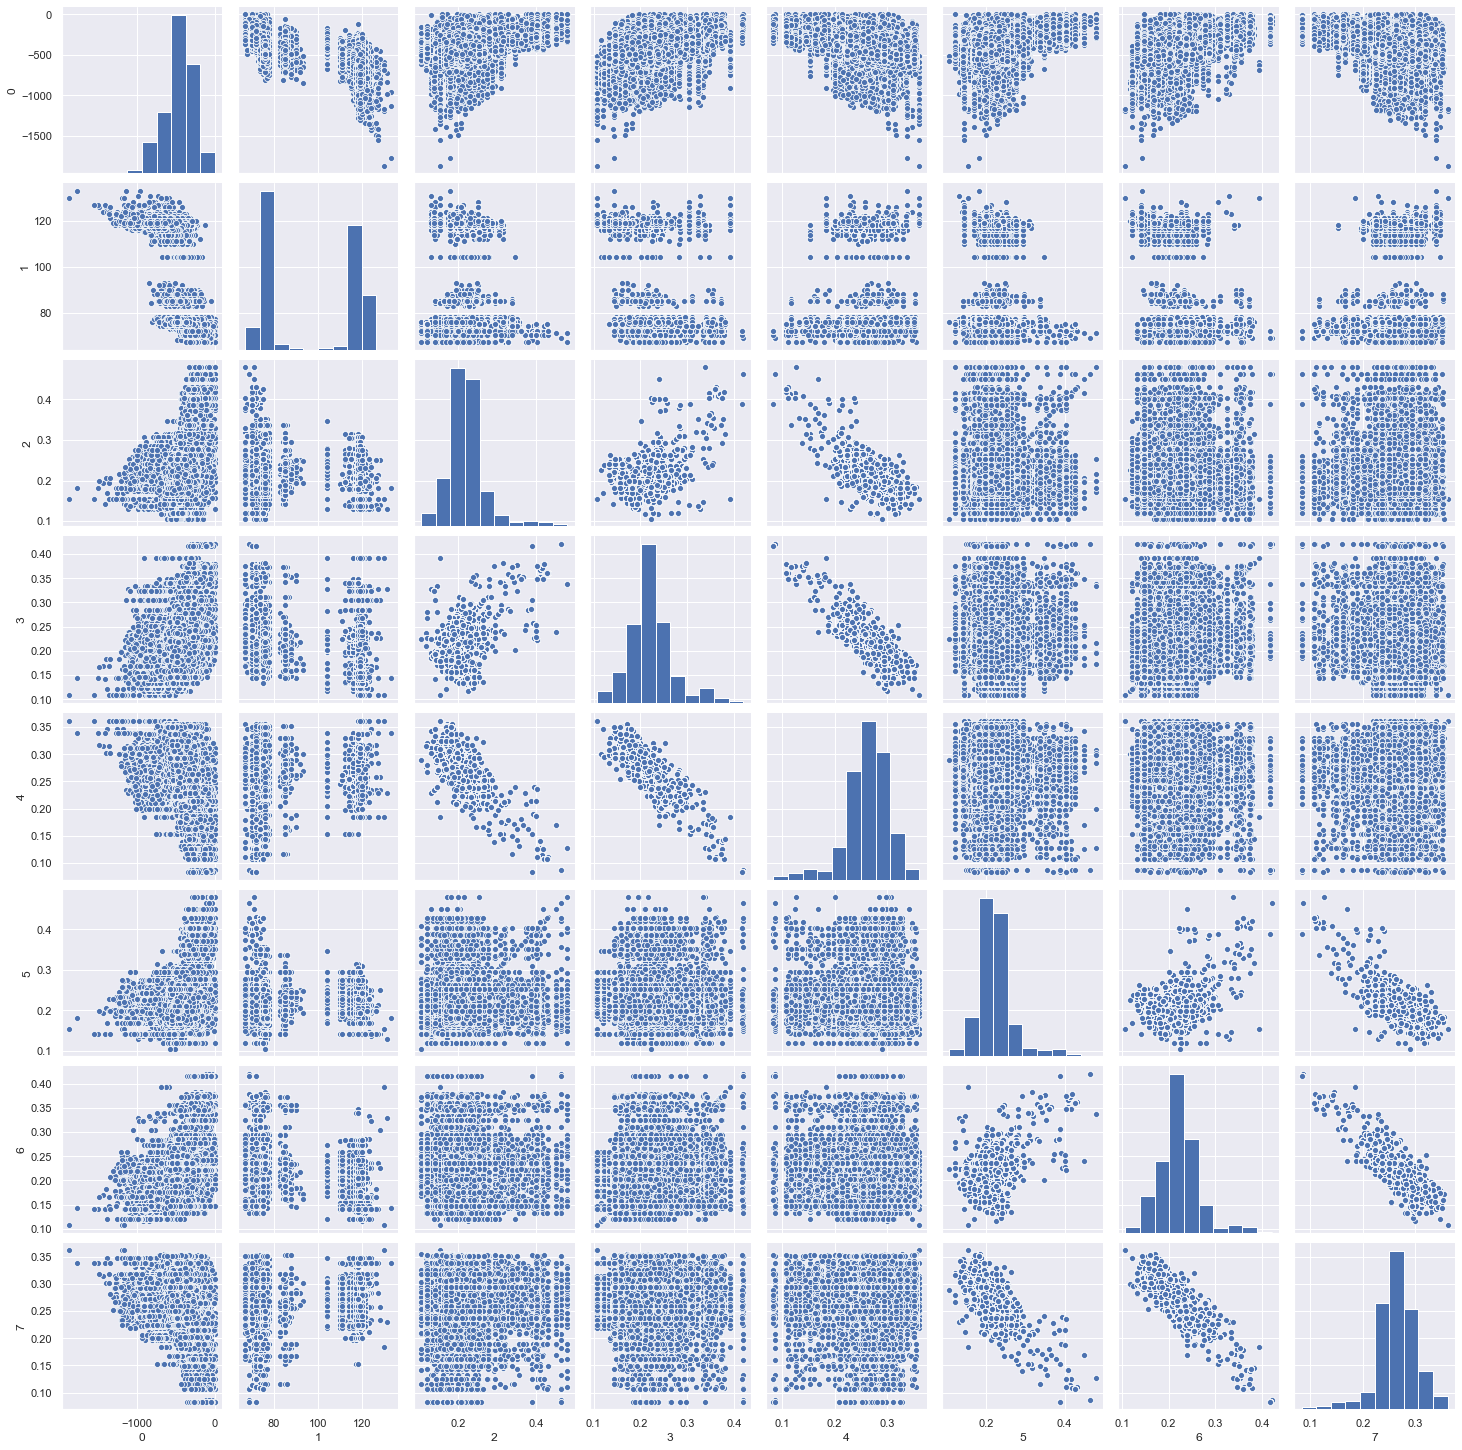

In [9]:
### Correlogram
plt.figure(figsize = (10, 10))
sns.pairplot(X_train)
plt.show()

In [10]:
X_train.skew()

0   -0.499056
1    0.009962
2    1.566974
3    0.932288
4   -1.055242
5    1.620758
6    0.900356
7   -0.911608
dtype: float64

In [11]:
X_train.kurt()

0    0.387648
1   -1.953463
2    5.003202
3    2.015075
4    2.273059
5    4.784119
6    2.599759
7    2.756461
dtype: float64

In [12]:
X_train.corr()

,0,1,2,3,4,5,6,7
0,1.000000,-0.663280,0.194105,0.362159,-0.280872,0.262120,0.360262,-0.313832
1,-0.663280,1.000000,0.058853,-0.227156,0.060998,-0.037395,-0.244345,0.143876
2,0.194105,0.058853,1.000000,0.408743,-0.708816,0.028552,-0.001860,-0.009916
3,0.362159,-0.227156,0.408743,1.000000,-0.817130,0.019351,0.087205,-0.059057
4,-0.280872,0.060998,-0.708816,-0.817130,1.000000,-0.025821,-0.043364,0.041946
5,0.262120,-0.037395,0.028552,0.019351,-0.025821,1.000000,0.481764,-0.698947
6,0.360262,-0.244345,-0.001860,0.087205,-0.043364,0.481764,1.000000,-0.869362
7,-0.313832,0.143876,-0.009916,-0.059057,0.041946,-0.698947,-0.869362,1.000000


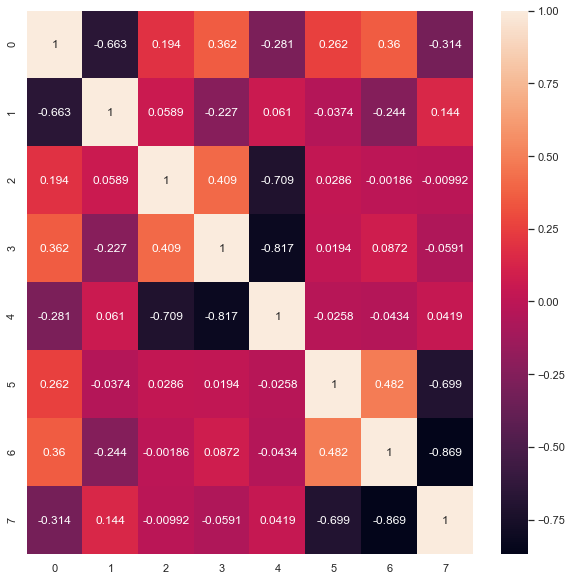

In [13]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train.corr(), annot = True, fmt = '.3g')
plt.show()

<b>From the analysis and visualization carried out above, it is obvious that the pairs of features 3 and 4, 6 and 7, and 2 and 4 possess a strong negative correlation.<b/>

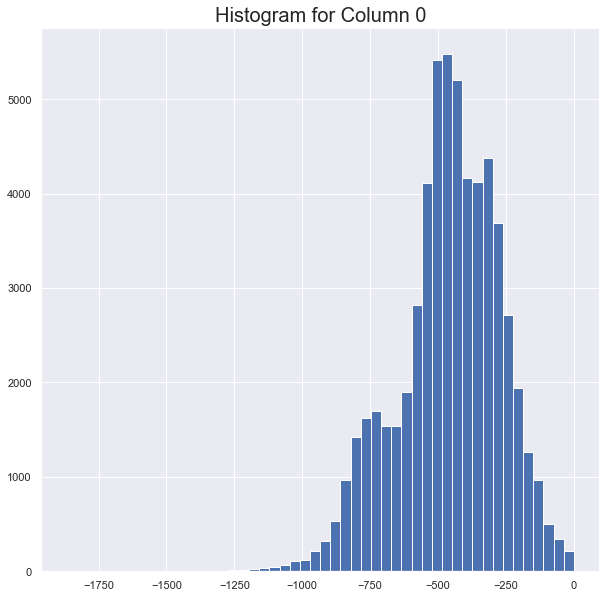

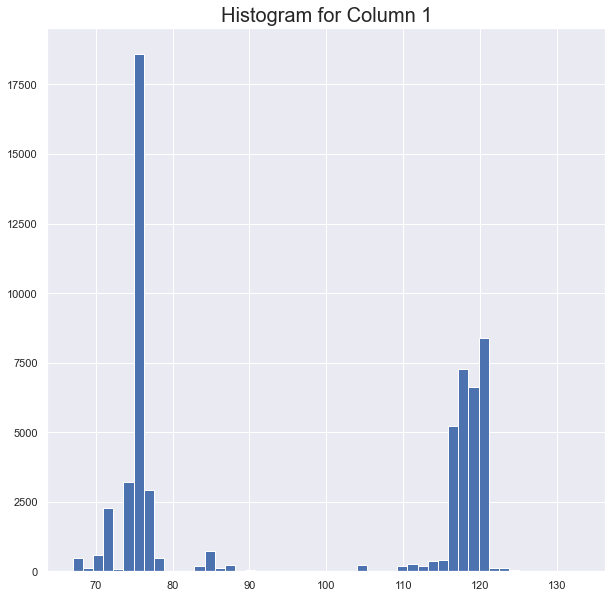

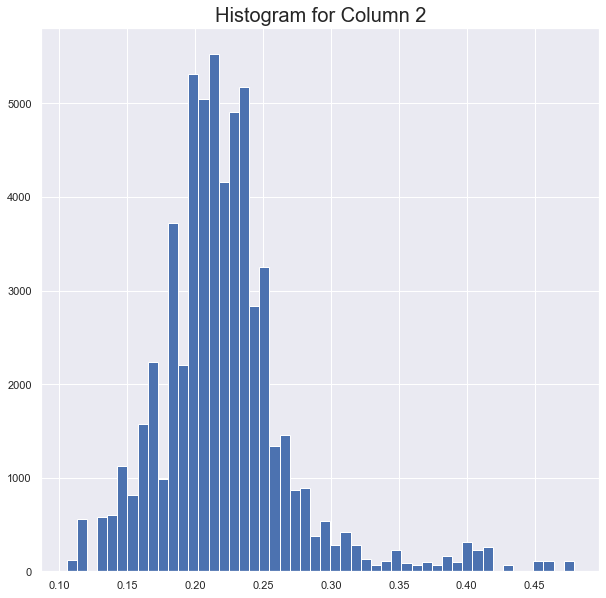

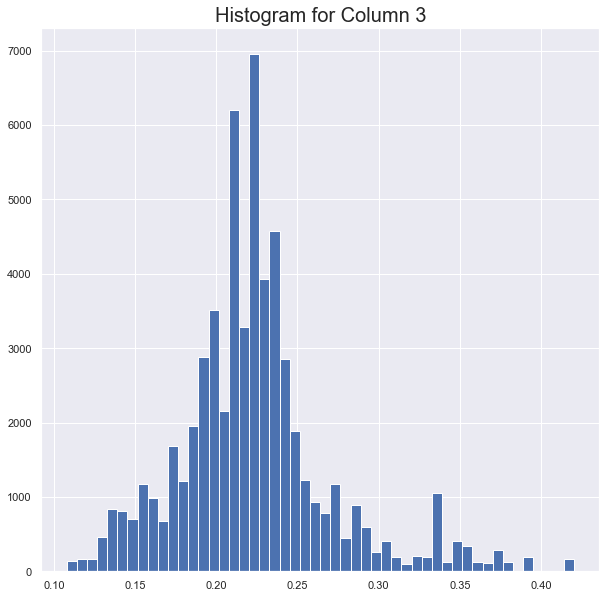

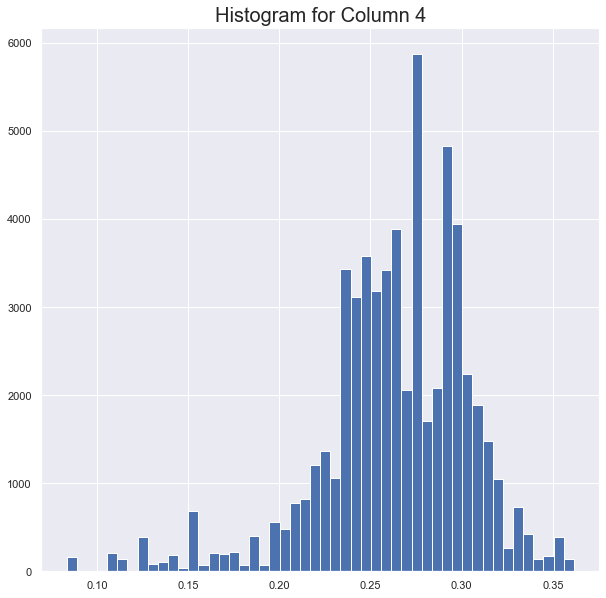

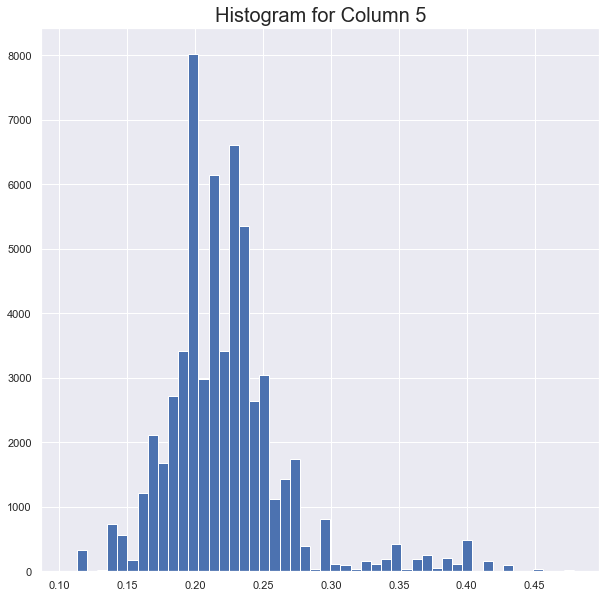

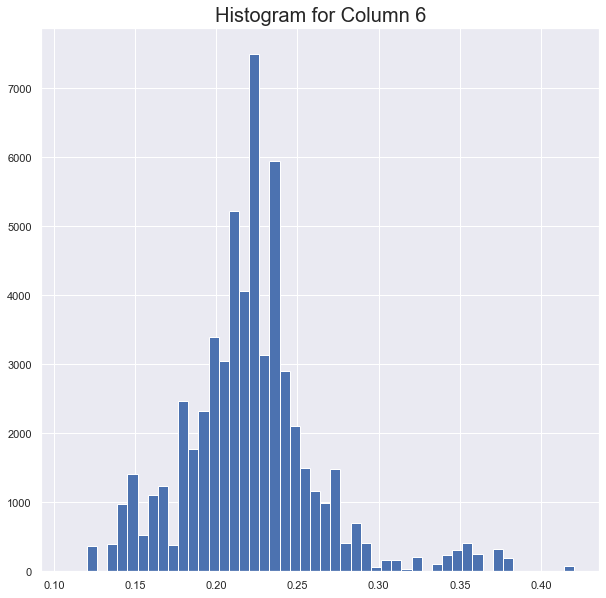

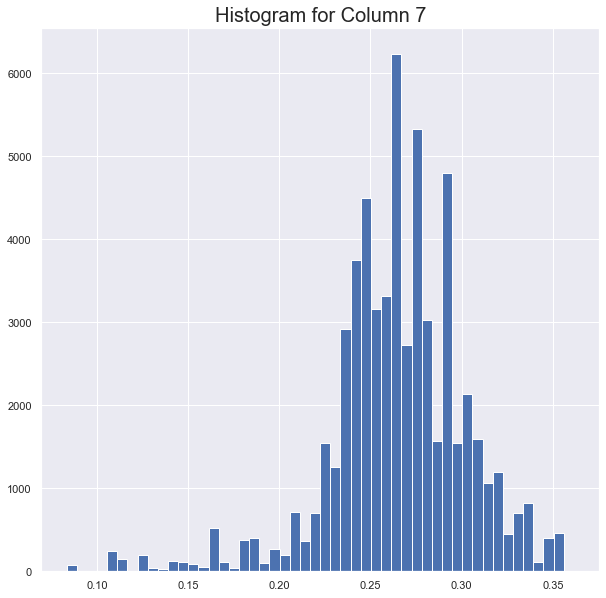

In [14]:
### Univariate analysis
for key in X_train.keys():
    plt.figure(figsize = (10, 10))
    plt.hist(x = X_train[key], bins = 50)
    plt.title(label = f'Histogram for Column {key}', fontsize = 20)
    plt.show()

In [15]:
X_train.corrwith(pd.Series(y_train))

0   -5.229925e-01
1    8.374565e-16
2    9.883011e-18
3   -6.829178e-17
4   -9.159674e-18
5   -2.528331e-18
6   -6.534216e-17
7    2.230008e-17
dtype: float64

In [16]:
type(X_train.corrwith(pd.Series(y_train)))

pandas.core.series.Series

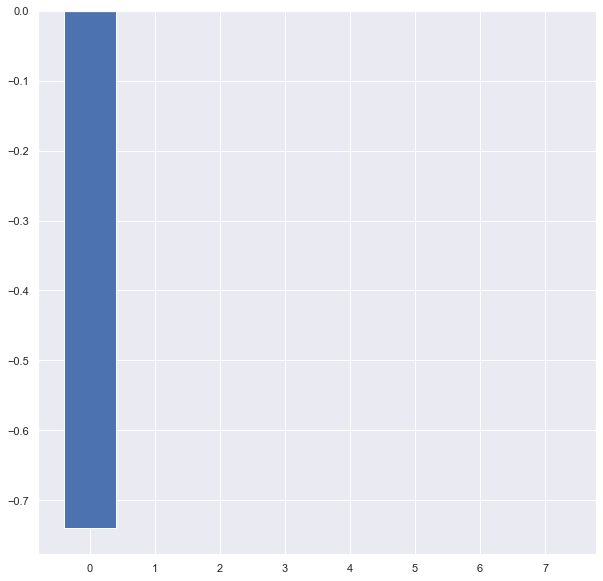

In [17]:
### Visualize feature-target correlation
plt.figure(figsize = (10, 10))
plt.bar(x = X_train.corrwith(pd.Series(y_train)).index,
        height = np.log1p(X_train.corrwith(pd.Series(y_train))))
plt.show()

<b>From the analysis above, it can be inferred that the first feature has the highest correlation with the target, and may likely be more instrumental in making our predictions. We can also say that the features closely resemble a Gaussian distribution. Another thing to take note of is the fact that a good number of the features exhibit a strong negative correlation with one another.<b/>

In [18]:
### Unique classes
np.unique(y_train)

array([-1.,  1.])

In [19]:
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [20]:
from collections import Counter
print(Counter(y_train))

Counter({0.0: 39690, 1.0: 19845})


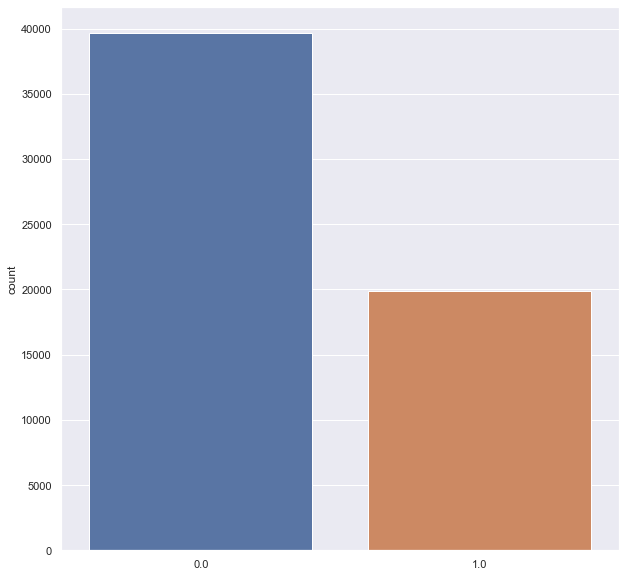

In [21]:
### Class distribution
plt.figure(figsize = (10, 10))
sns.countplot(x = y_train)
plt.show()

<b>The data is obviously plagued by class imbalance. This will have to be rectified. We will attempt to rectify this state of affairs using the `SMOTE` object class from the `imblearn` library.<b/>

In [22]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [23]:
### Instantiate appropriate estimators and transformers
log_reg = LogisticRegression()
svc = SVC()
sampler = SMOTE()
scaler = MinMaxScaler()
qtrans = QuantileTransformer(output_distribution = 'normal')

model_dict = {}
i = 0
for model in [log_reg, svc]:
    model_dict[i] = Pipeline(steps = [('scaler', scaler),
                                      ('qtrans', qtrans),
                                      ('sampler', sampler),
                                      ('model', model)
                                  ])
    i += 1

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

In [25]:
for model in model_dict.keys():
    model_dict[model].fit(X_train, y_train)
    print(' ')
    print('$$$$^^^^^$$$$')
    print(f'Classification report on train performance for model {model} \n{classification_report(y_train, model_dict[model].predict(X_train))}')
    print(f'Classification report on test performance for model {model} \n{classification_report(y_test, model_dict[model].predict(X_test))}')

$$$$^^^^^$$$$
Classification report on train performance for model 0 
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     39690
         1.0       0.79      0.89      0.84     19845

    accuracy                           0.88     59535
   macro avg       0.86      0.88      0.87     59535
weighted avg       0.89      0.88      0.89     59535

Classification report on test performance for model 0 
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92    181078
         1.0       0.83      0.87      0.85     90539

    accuracy                           0.90    271617
   macro avg       0.88      0.89      0.89    271617
weighted avg       0.90      0.90      0.90    271617

$$$$^^^^^$$$$
Classification report on train performance for model 1 
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     39690
         1.0       0.87      0.97      0.9

<b>ROC-AUC score for Logistic Regression<b/>

In [26]:
### Training performance
roc_auc_score(y_train, model_dict[0].predict(X_train))

0.8845175107079869

In [27]:
### Test performance
roc_auc_score(y_test, model_dict[0].predict(X_test))

0.8908343365842345

<b>ROC-AUC score for SVM<b/>

In [28]:
### Training performance
roc_auc_score(y_train, model_dict[1].predict(X_train))

0.9479213907785337

In [29]:
### Test performance
roc_auc_score(y_test, model_dict[1].predict(X_test))

0.9518301505428599